In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
#model training
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [8]:
df=pd.read_csv('data/data.csv')

In [9]:
df.head()

,sr_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,male,group B,bachelor's degree,standard,none,31,75,73
1,2,female,group B,high school,free/reduced,none,95,69,84
2,3,male,group E,some high school,standard,none,25,82,54
3,4,female,group C,associate's degree,standard,none,66,71,23
4,5,male,group D,some college,free/reduced,completed,86,27,31


In [11]:
X=df.drop(columns=['math_score'])
X.head()

,sr_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,1,male,group B,bachelor's degree,standard,none,75,73
1,2,female,group B,high school,free/reduced,none,69,84
2,3,male,group E,some high school,standard,none,82,54
3,4,female,group C,associate's degree,standard,none,71,23
4,5,male,group D,some college,free/reduced,completed,27,31


In [12]:
print('categories in gender:',end=' ' )
print(df['gender'].unique())

print('categories in race_ethnicity:',end=' ' )
print(df['race_ethnicity'].unique())

print('categories in parental_level_of_education:',end=' ' )
print(df['parental_level_of_education'].unique())

print('categories in lunch:',end=' ' )
print(df['lunch'].unique())
print('categories in test_preparation_course:',end=' ' )
print(df['test_preparation_course'].unique())

categories in gender: ['male' 'female']
categories in race_ethnicity: ['group B' 'group E' 'group C' 'group D' 'group A']
categories in parental_level_of_education: ["bachelor's degree" 'high school' 'some high school' "associate's degree"
 'some college' "master's degree"]
categories in lunch: ['standard' 'free/reduced']
categories in test_preparation_course: ['none' 'completed']


In [14]:
y=df['math_score']
y.head()

0    31
1    95
2    25
3    66
4    86
Name: math_score, dtype: int64

In [16]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OnehotEncoder', oh_encoder, cat_features),
        ('StandardScaler', numeric_transformer, num_features)

    ]
)


In [17]:
X=preprocessor.fit_transform(X) 


In [18]:
X

array([[ 0.        ,  1.        ,  0.        , ..., -1.73034364,
         0.62930209,  0.52000049],
       [ 1.        ,  0.        ,  0.        , ..., -1.72688639,
         0.37403159,  0.99658833],
       [ 0.        ,  1.        ,  0.        , ..., -1.72342914,
         0.92711768, -0.30319669],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.72344984,
        -0.26414468,  0.60665282],
       [ 0.        ,  1.        ,  0.        , ...,  1.72344984,
        -0.26414468,  0.60665282],
       [ 0.        ,  1.        ,  0.        , ...,  1.72344984,
        -0.26414468,  0.60665282]])

In [19]:
X.shape

(1002, 20)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((801, 20), (201, 20), (801,), (201,))

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [25]:
models = {  
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "KNeighbors Regressor": KNeighborsRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_mse, model_train_rmse, train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_mse, model_test_rmse, test_r2 = evaluate_model(
        y_test, y_test_pred
    )

    model_list.append(name)
    r2_list.append(test_r2)

    print(f"Model: {name}")
    print(f"RMSE (Train): {model_train_rmse:.4f}")
    print(f"MAE  (Train): {model_train_mae:.4f}")
    print(f"R2   (Train): {train_r2:.4f}")
    print(f"R2   (Test) : {test_r2:.4f}")
    print("-" * 30)


Model: Linear Regression
RMSE (Train): 22.8838
MAE  (Train): 19.6528
R2   (Train): 0.0293
R2   (Test) : -0.0165
------------------------------
Model: Ridge Regression
RMSE (Train): 22.8838
MAE  (Train): 19.6543
R2   (Train): 0.0293
R2   (Test) : -0.0164
------------------------------
Model: Lasso Regression
RMSE (Train): 23.2267
MAE  (Train): 20.0133
R2   (Train): 0.0000
R2   (Test) : -0.0021
------------------------------
Model: ElasticNet Regression
RMSE (Train): 23.1784
MAE  (Train): 19.9774
R2   (Train): 0.0042
R2   (Test) : -0.0047
------------------------------
Model: Decision Tree
RMSE (Train): 0.0000
MAE  (Train): 0.0000
R2   (Train): 1.0000
R2   (Test) : -1.1103
------------------------------
Model: Random Forest
RMSE (Train): 8.9945
MAE  (Train): 7.5829
R2   (Train): 0.8500
R2   (Test) : -0.0900
------------------------------
Model: Gradient Boosting
RMSE (Train): 18.5460
MAE  (Train): 15.5863
R2   (Train): 0.3624
R2   (Test) : -0.0777
------------------------------
Model: XG

In [26]:
pd.DataFrame({'Model':model_list, 'R2_Score':r2_list}).sort_values(by='R2_Score', ascending=False)

,Model,R2_Score
2,Lasso Regression,-0.002068
3,ElasticNet Regression,-0.004736
1,Ridge Regression,-0.016389
0,Linear Regression,-0.016515
6,Gradient Boosting,-0.077745
5,Random Forest,-0.089990
8,CatBoost,-0.189695
9,KNeighbors Regressor,-0.233597
7,XGBoost,-0.322779
4,Decision Tree,-1.110322


In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  
y_pred = linear_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Linear Regression Test R2 Score: {r2:.4f}")
print(f"Linear Regression Test RMSE: {rmse:.4f}")
print(f"Linear Regression Test MAE: {mae:.4f}")


Linear Regression Test R2 Score: -0.0165
Linear Regression Test RMSE: 22.5746
Linear Regression Test MAE: 19.3422


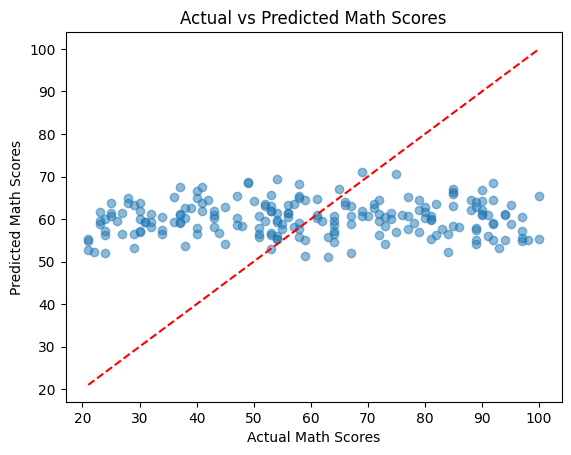

In [30]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores") 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Math Scores")
plt.show()

In [31]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
521,54,56.038668
739,40,57.821492
823,64,57.113581
662,54,69.299540
411,36,59.340921
